# ИТ Криминалистика - Упражнение 2

**Тема: Определяне на местоположение на лице в изображение**

Импортиране на необходими библиотеки на Python

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

Четене на изображение

In [ ]:
face_image = cv2.imread('./np2.jpg')

Визуализация на изображение

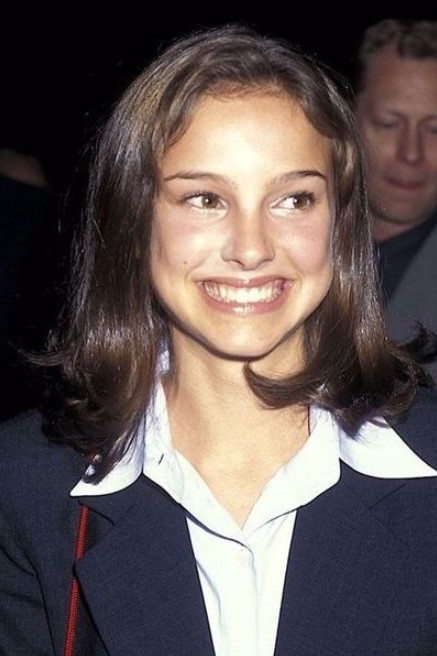

In [ ]:
cv2_imshow(face_image)

Преобразуване на цветно изображение в черно-бяло

In [ ]:
gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

Визуализация на черно-бяло изображение

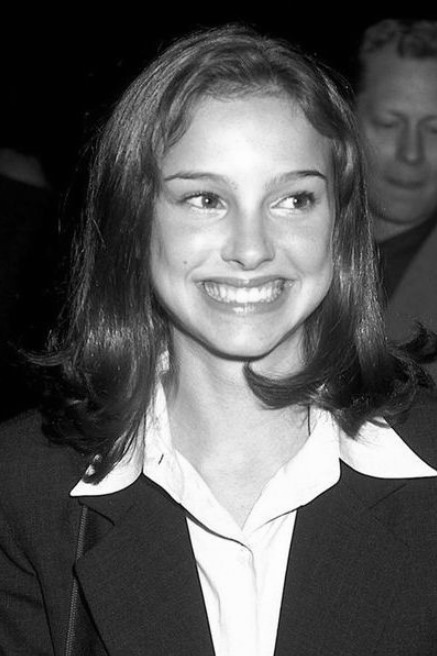

In [ ]:
cv2_imshow(gray_image)

Записване на класификатор Haarcascades - Frontal face default в променлива face_cascade

In [ ]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [ ]:
face_cascade.empty()

Засичане на всички лица в изображението и запис на откритите лица в списък faces

In [ ]:
faces = face_cascade.detectMultiScale(gray_image, 1.1,4)

Итериране през списък на откритите лица и очертаване на резултата в правоъгълник.

In [ ]:
for x, y, width, height in faces:
  cv2.rectangle(gray_image, (x,y), (x + width, y + height), color = (255,0,0), thickness=3)

Визуализиране на краен резултат

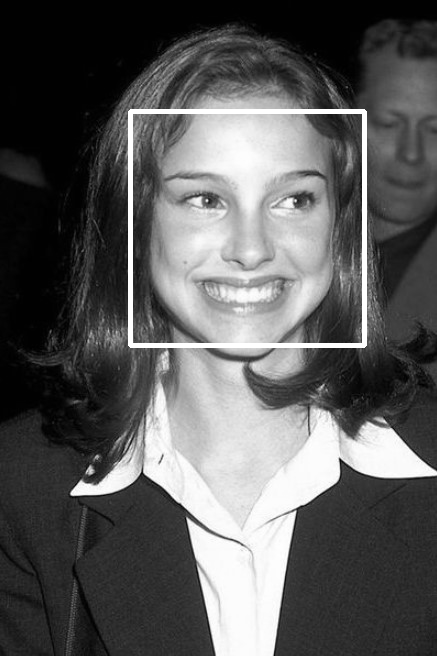

In [ ]:
cv2_imshow(gray_image)

In [ ]:


# Initialize webcam capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = gray[y:y+h, x:x+w]

        # Resize face region for feature extraction (if needed)
        # face_roi_resized = cv2.resize(face_roi, (desired_width, desired_height))

        # Extract features from the face region (replace with your feature extraction method)
        features = face_roi.flatten()  # Example: flatten the image

        # Perform face recognition
        label = recognition_model.predict([features])[0]

        # Draw bounding box and label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, str(label), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    # Display the frame
    cv2_imshow(frame)

    # Exit on 'q' press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()